# Stimulus-triggered responses

# Load and plot the data

In [1]:
%matplotlib notebook
import numpy as np
import deepdish as dd
from matplotlib import pyplot as plt

Here, we will process data coming from the entire experiment with the functions that we defined in the first notebook, and we use spike times to calculate responses to stimuli (odorants) that were presented to the cockroach.

# Import

**Exercise 0: spike detection**
 - Load the data in full_trace_cockroach1.hdf5 and plot it as you did in notebook 0;
 - Now we want to extract spikes from this trace as well: plot a threshold that looks reasonable for this full dataset (warning! The trace might contain artifacts, explore the data carefully!)
 - After you selected a threshold, use the function you defined in the first notebook to detect spikes. Try to avoid copy-pasting code between notebook: you can try to define them in  a "utilities.py" file in this folder and load from there functions that have to be shared across notebooks!


In [48]:
trace = dd.io.load("full_trace_cockroach1.hdf5")

<IPython.core.display.Javascript object>


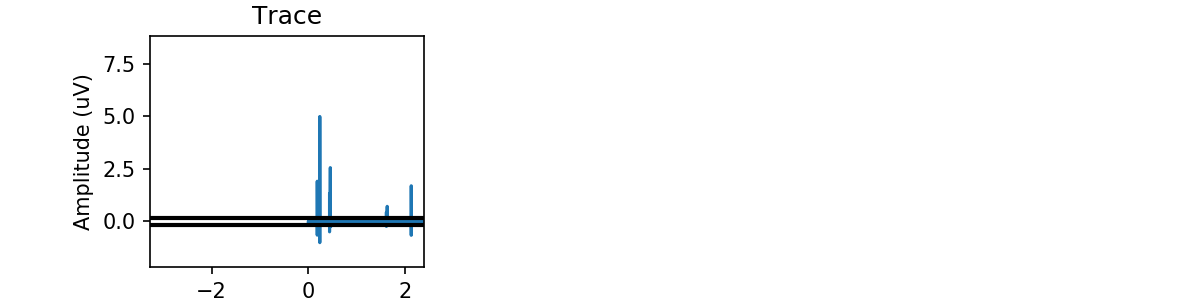

[[       0]
 [       1]
 [       2]
 ...
 [51326529]
 [51326530]
 [51326531]]


In [39]:

# trace duration extraction
trace_duration = 


# plot with various axes scales
plt.figure(1, figsize=(8, 2))

# computing avg and standard deviation


# defining the threshold: 20 std



#plotting the trace



# extracting values between the 2 thresholds



**Exercise 1: spike cleaning (not necessary for next points!)**

As you might have noticed, it is likely that you spike detection function have piked up some artefacts from the trace. Altough not very problematic in our case (there is much more real spiking than artefacts), it would be good to have a function for remove suc artefacts.
 - To clean artefacts, we need to look at the shape of each spike. Write a function that takes as inputs the trace, spike indexes, and a window half-size and return a matrix containing for every spike the segment of the trace around it (in a window specified by the relative input parameter). The final matrix will have shape n_spikes x 2*window_half_size
 - Plot the spikes (or a subsample of them) and figure out a conditional that you could set that would get rid of the artefacts (e.g., the shape being higher or lower than a threshold at certain timepoints.). Tip: use small linewidths or transparencies when plotting thousands of lines will give a sense of the density of the lines on the plot.
 - (pro, facultative): try to use principal component analysis on your spike matrix and make a scatter plot of the first 2 components. Can you detect noise from spikes in this plot?

**Exercise 2: generate firing rate trace**

Now that we got spike times, we would like to generate a trace with the instantaneous firing rate of the neuron. To do that, we will need to do the following:
 - Create an array of zeros of the same length as the trace and set to 1 the bins where a spike was detected;
 - Create a pandas DataFrame from this array, and use the .rolling().sum() method to smooth it (look online for examples). Try the rolling() method with different time bins: what happens?
 - Normalize the results to get spikes/seconds as your final units (you are summing in a bin of x seconds the spikes, what do you need to do to obtain the actual rate?)

**Exercise 2: looking at the stimulus metadata**

 - Load the metadata from the stimulus_metadata.hdf5 file; here, you will find an array containing the odorant type (either B-utanol, I-soamyl acetate, L-inanol, or O-ctanol) and an array containing the exact time in seconds of each odorant stimulation;
 - Define a function that takes the two arrays and a choosen odor as inputs and find out the times at which that odor was presented;
 - Given the sampling rate of the electrophysiology (20 kHz), and knowing that the 0 of the cell recording time and of the odorant time where synchronized, write a function that given an odorant time in seconds find the closest index of the electrophysiological trace at which the odorant was presented;

In [2]:
metadata = dd.io.load("stimulus_metadata.hdf5")

**Exercise 3: looking at stimulus responses**

 - Try to recicle the function that you wrote for cropping spike shapes to crop the spiking rate trace around all the  presentations for one odor;
 - plot the average firing rate response together with the individual repetitions to all 4 different odorants;
 - use imshow to get a different representation of individual repetitions responses;

**Exercise 4: some statistics**
How do we assess statistical significance of our responses? 
 - If firing rate over time was normally distributed in time, a t-test would probably be appropriate. Make an histogram of firing rate of the cell to see how normal the distribution looks like!
 - A less costrained approach would be bootstrapping. To perform bootstrapping on our data, you will need to generate fake "responses" by cropping the firing rate trace at random points in time, for many times (~a thousand?). Then, you can those segments to calculate a 0.95 or a 0.99 confidence interval (c.i.) for your responses. 
 - Plot the confidence intervals and the cell responses: do they look significant?